In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
#"default" is my dependent variable

In [3]:
#Read the input file and store it in a DataFrame

gc_df = pd.read_csv('german_credit.csv')

In [4]:
#Shape of the Dataset

gc_df.shape

(1000, 21)

In [5]:
#Features and target column in the datset

gc_df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
#Check datatype of all columns

gc_df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [7]:
#Validate first 5 rows in the dataframe

gc_df.head(5).T

,0,1,2,3,4
default,0,1,0,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM,no checking account,< 0 DM,< 0 DM
duration_in_month,6,48,12,42,24
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
purpose,domestic appliances,domestic appliances,(vacation - does not exist?),radio/television,car (new)
credit_amount,1169,5951,2096,7882,4870
savings,unknown/ no savings account,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years,4 <= ... < 7 years,4 <= ... < 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2,2,2,3
personal_status_sex,male : single,female : divorced/separated/married,male : single,male : single,male : single


In [8]:
#Validate last 5 rows in the dataframe

gc_df.tail(5).T

,995,996,997,998,999
default,0,0,0,1,0
account_check_status,no checking account,< 0 DM,no checking account,< 0 DM,0 <= ... < 200 DM
duration_in_month,12,30,12,45,45
credit_history,existing credits paid back duly till now,existing credits paid back duly till now,existing credits paid back duly till now,existing credits paid back duly till now,critical account/ other credits existing (not ...
purpose,radio/television,car (used),domestic appliances,domestic appliances,car (used)
credit_amount,1736,3857,804,1845,4576
savings,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM,100 <= ... < 500 DM
present_emp_since,4 <= ... < 7 years,1 <= ... < 4 years,.. >= 7 years,1 <= ... < 4 years,unemployed
installment_as_income_perc,3,4,4,4,3
personal_status_sex,female : divorced/separated/married,male : divorced/separated,male : single,male : single,male : single


In [9]:
#Check for null values in dataset

gc_df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [10]:
print('\nThere are no null values\n')


There are no null values



In [11]:
# Unique values in the target column

gc_df['default'].unique()

array([0, 1], dtype=int64)

In [12]:
#5-point summary of numerical columns

gc_df.drop('default', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [13]:
# Lets build a Ensemble model but need to modify the dataset first

In [14]:
#Create DataFrame of all numerical columns

num_columns = gc_df.select_dtypes(exclude='object')

In [15]:
num_columns.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance'],
      dtype='object')

In [16]:
num_columns.dtypes

default                       int64
duration_in_month             int64
credit_amount                 int64
installment_as_income_perc    int64
present_res_since             int64
age                           int64
credits_this_bank             int64
people_under_maintenance      int64
dtype: object

In [17]:
#Create DataFrame of all Categorical columns

cat_columns = gc_df.select_dtypes(include='object')

In [18]:
cat_columns.columns

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [19]:
cat_columns.dtypes

account_check_status       object
credit_history             object
purpose                    object
savings                    object
present_emp_since          object
personal_status_sex        object
other_debtors              object
property                   object
other_installment_plans    object
housing                    object
job                        object
telephone                  object
foreign_worker             object
dtype: object

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [20]:
#Apply pd.get_dummies() method on the dataframe to convert all non-numeric variables to numeric type.

gc_df = pd.get_dummies(gc_df, drop_first=True)

In [21]:
#Check the datatypes of all columns after one-hot encoding using get_dummies() method.

gc_df.dtypes

default                                                                       int64
duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)  

In [22]:
# Print Shape of model data

In [23]:
gc_df.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [24]:
#Check the correlation between all numerical columns.
#Drop default columna s it is the target column and is categorical, even though the datatype is int

corr = num_columns.drop('default', axis=1).corr()
corr.style.background_gradient(cmap='YlGnBu')

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
duration_in_month,1,0.624984,0.0747488,0.0340672,-0.0361364,-0.0112836,-0.0238345
credit_amount,0.624984,1,-0.271316,0.0289263,0.0327164,0.0207946,0.0171422
installment_as_income_perc,0.0747488,-0.271316,1,0.0493024,0.0582657,0.0216687,-0.0712069
present_res_since,0.0340672,0.0289263,0.0493024,1,0.266419,0.0896252,0.0426434
age,-0.0361364,0.0327164,0.0582657,0.266419,1,0.149254,0.118201
credits_this_bank,-0.0112836,0.0207946,0.0216687,0.0896252,0.149254,1,0.109667
people_under_maintenance,-0.0238345,0.0171422,-0.0712069,0.0426434,0.118201,0.109667,1


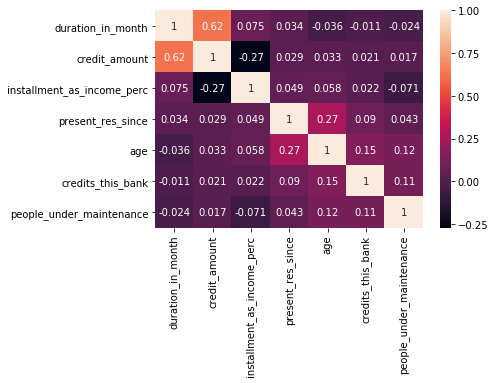

In [25]:
#heat map to visualize correlation between numerical columns

ax = sns.heatmap(corr, annot=True)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [26]:
# Create Features datset and target dataset

X = gc_df.drop('default', axis=1)
y = gc_df['default']

In [27]:
#use test-train_split() in model_selection module to split the dataset

from sklearn.model_selection import train_test_split

In [28]:
#split the dataset in the ratio 70:30 with random seed of 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

### Q4 Build Random Forest Model( 2 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [29]:
#Import RandomForestClassifier from ensemble module

from sklearn.ensemble import RandomForestClassifier

In [30]:
#Instantiate the RandomForestClassifier class

rf_clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [31]:
#Fit the model on training set

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [32]:
#Predict the target classes using test set

yhat_rf = rf_clf.predict(X_test)

In [33]:
#Model accuracy with score() method on training set

rf_clf.score(X_train, y_train)

1.0

In [34]:
#Model accuracy with score() method on test set

rf_clf.score(X_test, y_test)

0.79

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [35]:
#Import require accuracy metrics from metrics module

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
#confusion matrix

confusion_matrix(y_test, yhat_rf)

array([[202,  15],
       [ 48,  35]], dtype=int64)

In [37]:
#Accuracy score

accuracy_score(y_test, yhat_rf)

0.79

In [38]:
#Precision score

precision_score(y_test, yhat_rf)

0.7

In [39]:
#Recall score

recall_score(y_test, yhat_rf)

0.42168674698795183

In [40]:
#f1_score

f1_score(y_test, yhat_rf)

0.5263157894736842

### Q6 Show the list of the features importance( 1 Marks)

In [41]:
#Finding the features which are of importance

rf_clf.feature_importances_

array([0.08627249, 0.11617085, 0.04119211, 0.03983469, 0.09195836,
       0.02083163, 0.0162916 , 0.0347387 , 0.01011159, 0.05691999,
       0.02033489, 0.01008872, 0.01620212, 0.00903495, 0.01179654,
       0.01891546, 0.01190483, 0.01701337, 0.00444198, 0.00210819,
       0.01502832, 0.00257366, 0.00082346, 0.02092896, 0.01042512,
       0.00723522, 0.01489094, 0.01805913, 0.01768662, 0.01493253,
       0.01031341, 0.00786391, 0.01047386, 0.02095204, 0.0082958 ,
       0.01202967, 0.01770357, 0.0175085 , 0.01713487, 0.02185859,
       0.00697285, 0.01652216, 0.01224233, 0.01963493, 0.00417616,
       0.01379909, 0.01992028, 0.00385094])

In [42]:
# Print the Feature list and the feature importance using a DataFrame

feature_imp = pd.DataFrame(rf_clf.feature_importances_, columns = ["Feature Importance"], index = X_train.columns)
feature_imp.index.name = 'Features'
print(feature_imp)

                                                    Feature Importance
Features                                                              
duration_in_month                                             0.086272
credit_amount                                                 0.116171
installment_as_income_perc                                    0.041192
present_res_since                                             0.039835
age                                                           0.091958
credits_this_bank                                             0.020832
people_under_maintenance                                      0.016292
account_check_status_< 0 DM                                   0.034739
account_check_status_>= 200 DM / salary assignm...            0.010112
account_check_status_no checking account                      0.056920
credit_history_critical account/ other credits ...            0.020335
credit_history_delay in paying off in the past                0.010089
credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [43]:
#Import KFold and cross_val_score from model_selection

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
# Use below values
num_folds = 10
seed = 77

In [45]:
#Validate the Random Forest model build above using k fold

In [46]:
#Perform the k-fold training using for loop with an instance of KFold class for k=10 folds and seed=77
#Find the scores by fitting the model on train sets using KFold method

scores_manual = []
kfold_cv = KFold(n_splits=10, shuffle=False, random_state=77)
for i in range(10):
    result = next(kfold_cv.split(X), None)
    X_tr = X.iloc[result[0]]
    X_te = X.iloc[result[1]]
    y_tr = y.iloc[result[0]]
    y_te = y.iloc[result[1]]
    rf_clf.fit(X_tr, y_tr)
    scores_manual.append(rf_clf.score(X_te,y_te))

In [47]:
#Print Performance measures by fitting the model on train sets got by splitting the datset using KFold 


print("\nPerformance Measures for k-fold training using instance of KFold class:\n")
print('Mean Score is {0} and Standard Deviation Score is {1}\n'.format(np.mean(scores_manual), np.std(scores_manual)))


Performance Measures for k-fold training using instance of KFold class:

Mean Score is 0.8699999999999999 and Standard Deviation Score is 1.1102230246251565e-16



In [48]:
#Find the scores by fitting the model on train sets using cross_val_score method

scores = cross_val_score(rf_clf, X, y, cv=10)

In [49]:
#Calculate Mean score

In [50]:
print("\nPerformance Measures using cross_val_score method:\n")
print("Mean Score is ", scores.mean(), "\n")


Performance Measures using cross_val_score method:

Mean Score is  0.759 



In [51]:
# Calculate score standard deviation using std()

In [52]:
print("\nPerformance Measures using cross_val_score method:\n")
print("Standard Deviation Score is ", scores.std(), "\n")


Performance Measures using cross_val_score method:

Standard Deviation Score is  0.04085339643163101 



### Q8 Build Ada boosting model, check the accuracy, and print confusion matrix ( 1 Marks)

In [53]:
#Check the shape of X, y,training set and test sets

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1000, 48) (1000,)
(700, 48) (700,)
(300, 48) (300,)


In [54]:
#Import AdaBoostClassifier from ensemble module
#Import DecisionTreeClassifier from tree module

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
#Implementing AdaBoost Classifier using SAMME.R method which relies on class probabilities
#Instantiate the AdaBoostClassifier class

adb_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=7)
                             ,n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=7)

In [56]:
#Fit the model on training set

adb_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=7,
                                

In [57]:
#Predict the target classes using test set

yhat_adb = adb_clf.predict(X_test)

In [58]:
#Model accuracy with score() method on training set

adb_clf.score(X_train, y_train)

1.0

In [59]:
#Model accuracy with score() method on test set

adb_clf.score(X_test, y_test)

0.71

In [60]:
#confusion matrix

confusion_matrix(y_test, yhat_adb)

array([[171,  46],
       [ 41,  42]], dtype=int64)

In [61]:
#Accuracy score

accuracy_score(y_test, yhat_adb)

0.71

In [62]:
#Precision score

precision_score(y_test, yhat_adb)

0.4772727272727273

In [63]:
#Recall score

recall_score(y_test, yhat_adb)

0.5060240963855421

In [64]:
#f1_score

f1_score(y_test, yhat_adb)

0.49122807017543857

### Q9. Build Gradient boosting model, check the accuracy, and print confusion matrix ( 1 Marks)
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [65]:
#Import GradientBoostingClassifier from ensemble module
#Import DecisionTreeClassifier from tree module

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
#Instantiate the GradientBoostingClassifier class
gdb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=1.0, n_estimators=100, subsample=1.0,
                                    criterion= 'friedman_mse', max_depth=3)

In [67]:
#Fit the model on training set

gdb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
#Predict the target classes using test set

yhat_gdb = gdb_clf.predict(X_test)

In [69]:
#Model accuracy with score() method on training set

gdb_clf.score(X_train, y_train)

1.0

In [70]:
#Model accuracy with score() method on test set

gdb_clf.score(X_test, y_test)

0.7666666666666667

In [71]:
#confusion matrix

confusion_matrix(y_test, yhat_gdb)

array([[180,  37],
       [ 33,  50]], dtype=int64)

In [72]:
#Accuracy score

accuracy_score(y_test, yhat_gdb)

0.7666666666666667

In [73]:
#Precision score

precision_score(y_test, yhat_gdb)

0.5747126436781609

In [74]:
#Recall score or Specificity or TruePositiveRate

recall_score(y_test, yhat_gdb)

0.6024096385542169

In [75]:
#f1_score

f1_score(y_test, yhat_gdb)

0.5882352941176471

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [76]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [77]:
#Fit Random Classifier model to each resampled training set and predict the classes in the test set.
#Find the accuracy score of the model trained on each sample.

from sklearn.utils import resample
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy", bootstrap=True,random_state=9999)

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf_clf.fit(X_, y_)
    y_pred = rf_clf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [78]:
#Compute the mean and standard deviation of the accuracies computed for each score.

accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7723333333333333
Standard deviation:  0.015779733838059504
